<a href="https://colab.research.google.com/github/RV05/Miscellaneous-tasks-DL/blob/main/Delamination1_Ridge_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/d_g - Sheet1.csv')

In [ ]:
dataset.drop(columns=['Thrust_force','Material_removal_rate'],inplace=True)

In [ ]:
dataset.drop(columns='Test',inplace=True)

In [ ]:
numerical_features = ["Spindle_speed",	"Feed_rate"	,"Point_angle"]

In [ ]:
from scipy.stats import zscore
#Train test split
# numeric_cols = carprice.select_dtypes(include=[np.number]).columns
X = dataset[numerical_features]

In [ ]:
y = dataset['Delamination']

In [ ]:
X.head()

,Spindle_speed,Feed_rate,Point_angle
0,1200,0.02,100
1,1200,0.06,100
2,1200,0.10,100
3,1200,0.14,100
4,1200,0.18,100


In [ ]:
y.head()

0    1.2986
1    1.3943
2    1.3851
3    1.4258
4    1.4550
Name: Delamination, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(60, 3)
(15, 3)


In [ ]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=0.0001 , max_iter= 3000).fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

0.7135869095284237

In [ ]:
y_pred_test = reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

MSE_test  = mean_squared_error(10**(y_test), 10**(y_pred_test))
print("MSE_test :" , MSE_test)

RMSE_test = np.sqrt(MSE_test)
print("RMSE_test :" ,RMSE_test)

MSE_test : 21.248902872308896
RMSE_test : 4.609653226904264


In [ ]:
from sklearn.metrics import r2_score
r2_test = r2_score(10**(y_test), 10**(y_pred_test))
print("R2_test :" ,r2_test)
print("Adjusted R2 Test : ",1-(1-r2_score(10**(y_test), 10**(y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2_test : 0.5838555422539617
Adjusted R2 Test :  0.4703615992323149


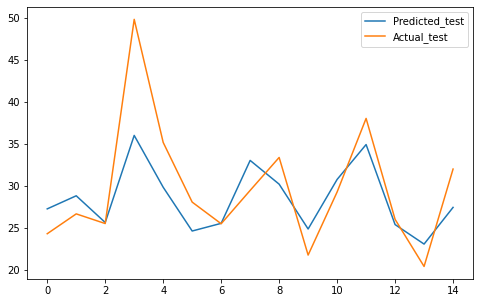

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_test))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted_test","Actual_test"])
plt.show()

In [ ]:
y_pred_train = reg.predict(X_train)

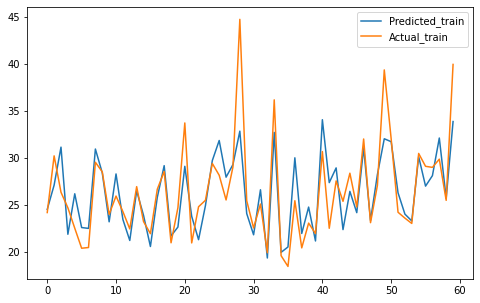

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_train))
plt.plot(np.array(10**(y_train)))
plt.legend(["Predicted_train","Actual_train"])
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

MSE_train  = mean_squared_error(10**(y_train), 10**(y_pred_train))
print("MSE_train :" , MSE_train)

RMSE_train = np.sqrt(MSE_train)
print("RMSE_train :" ,RMSE_train)

MSE_train : 8.216529628153014
RMSE_train : 2.866448957883781


In [ ]:
from sklearn.metrics import r2_score
r2_train = r2_score(10**(y_train), 10**(y_pred_train))
print("R2_train :" ,r2_train)
print("Adjusted R2 train : ",1-(1-r2_score(10**(y_train), 10**(y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

R2_train : 0.6782741868528022
Adjusted R2 train :  0.6610388754342023


In [ ]:

scores = cross_val_score(reg, X_train, y_train, scoring='r2', cv=5)
scores      

array([0.33767772, 0.44695023, 0.76851122, 0.35968506, 0.6860357 ])

In [ ]:
scores = cross_val_score(reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores

array([-0.00189514, -0.00185881, -0.00265964, -0.00211746, -0.00177696])

In [ ]:
scores = cross_val_score(reg, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
scores

array([-0.04353322, -0.04311397, -0.05157167, -0.04601586, -0.04215402])

In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])